In [1]:
pip install pandas matplotlib seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 812.7 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd



In [31]:
file_path = r'C:\Program Files\Blender Foundation\Blender 4.1\city_generation_entropy_by_rand.csv'
df = pd.read_csv(file_path)


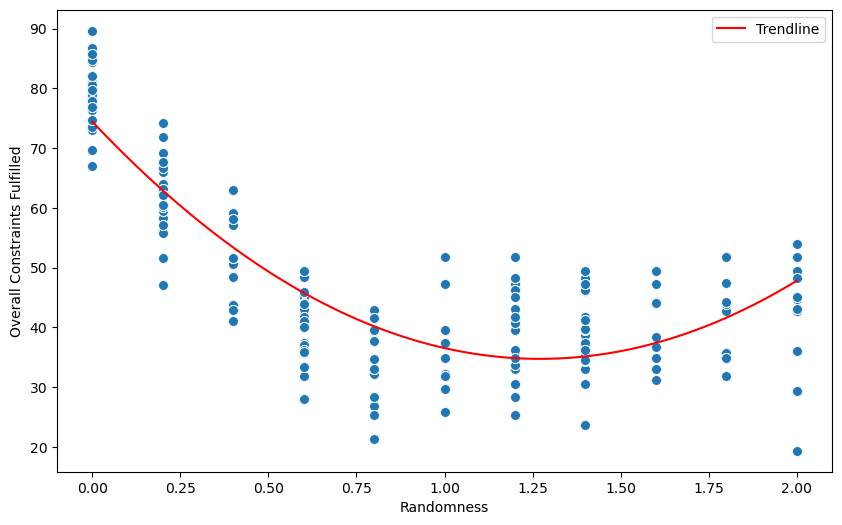

In [19]:
# Scatter Plot for Overall Criteria Fulfillment with Polynomial Trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Randomness', y='Overall Constraints Fulfilled', s=50)

# Fit a second-degree polynomial
z = np.polyfit(df['Randomness'], df['Overall Constraints Fulfilled'], 2)
p = np.poly1d(z)

# Generate x values for plotting the polynomial
x = np.linspace(df['Randomness'].min(), df['Randomness'].max(), 100)
plt.plot(x, p(x), color='red', label='Trendline')
plt.legend()
plt.xlabel('Randomness')
plt.ylabel('Overall Constraints Fulfilled')
plt.savefig('Plots/Overall_constraints_fulfilled_by_randomness_new.png')
plt.show()

# Save the plot


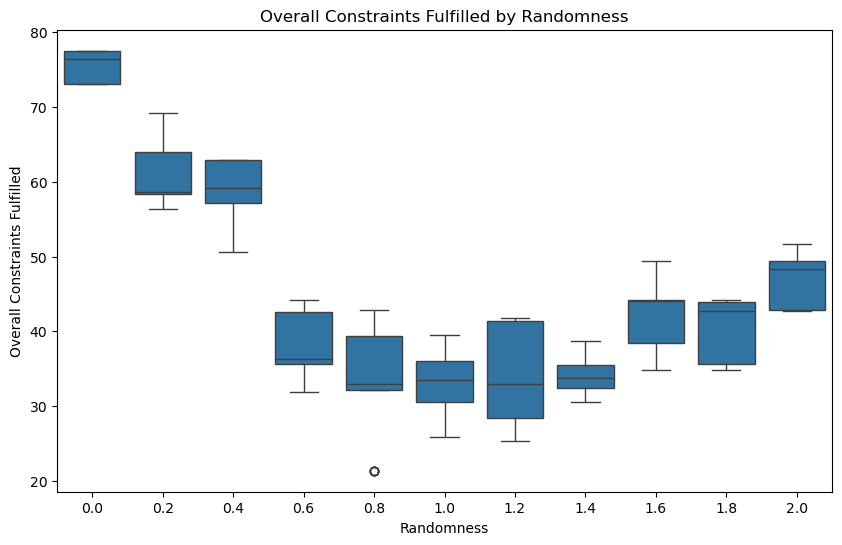

In [50]:
# Box Plot for Overall Constraints Fulfillment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Randomness', y='Overall Constraints Fulfilled')
plt.title('Overall Constraints Fulfilled by Randomness')
plt.xlabel('Randomness')
plt.ylabel('Overall Constraints Fulfilled')
plt.savefig('Plots/Overall_constraints_fulfilled_by_randomness_BoxPlot.png')
plt.show()


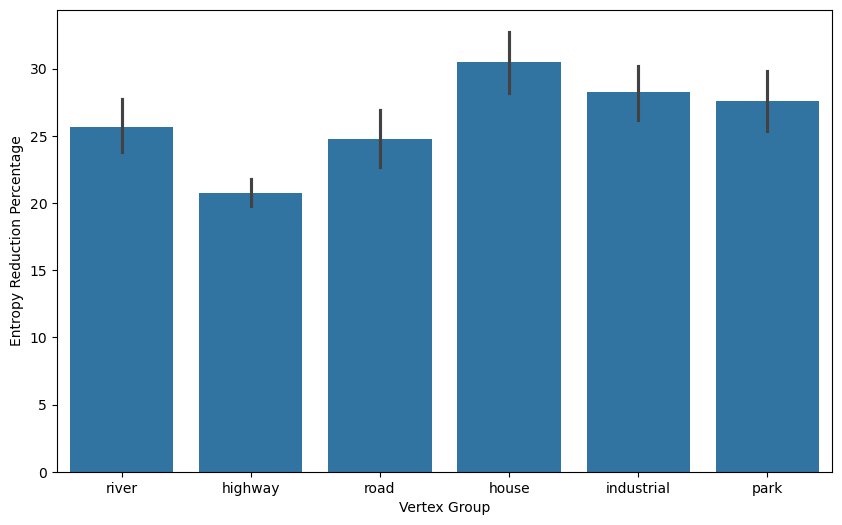

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vertex Group', y='Entropy Reduction Percentage')
plt.xlabel('Vertex Group')
plt.ylabel('Entropy Reduction Percentage')
plt.savefig('Plots/entropy_reduction_by_vertex_group.png')
plt.show()



In [32]:
file_path = r'C:\Program Files\Blender Foundation\Blender 4.1\city_generation_evaluation.csv'
df = pd.read_csv(file_path)

C:\Users\jakob\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3550: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


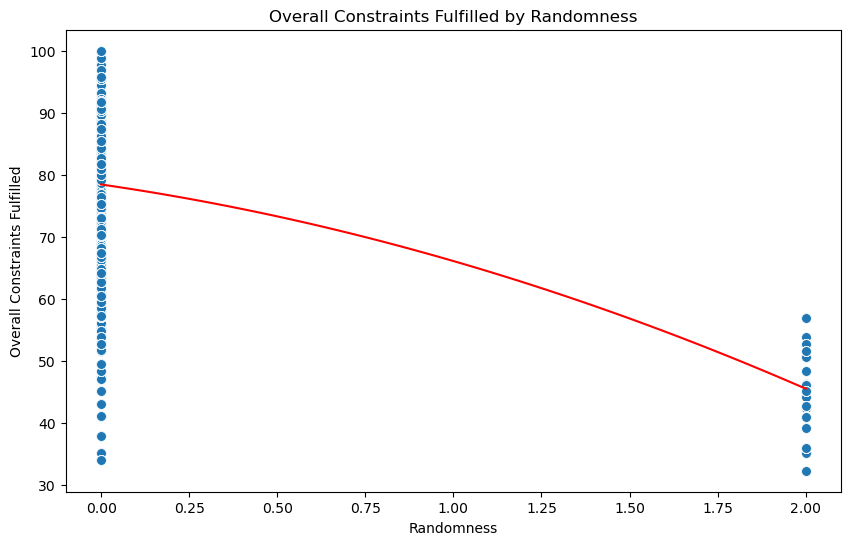

In [22]:
# Scatter Plot for Overall Criteria Fulfillment with Polynomial Trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Randomness', y='Overall Constraints Fulfilled', s=50)

# Fit a second-degree polynomial
z = np.polyfit(df['Randomness'], df['Overall Constraints Fulfilled'], 2)
p = np.poly1d(z)

# Generate x values for plotting the polynomial
x = np.linspace(df['Randomness'].min(), df['Randomness'].max(), 100)
plt.plot(x, p(x), color='red')

plt.title('Overall Constraints Fulfilled by Randomness')
plt.xlabel('Randomness')
plt.ylabel('Overall Constraints Fulfilled')
plt.savefig('Plots/Overall_constraints_fulfilled_by_randomness_big_data.png')
plt.show()

# Save the plot

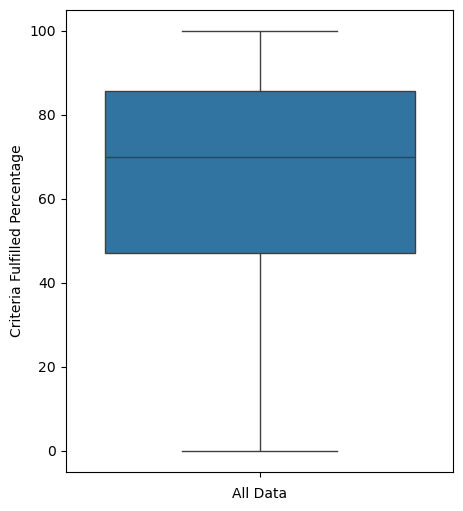

In [15]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, y='Criteria Fulfilled Percentage')
plt.ylabel('Criteria Fulfilled Percentage')
plt.xlabel('All Data')

# Save the plot
plt.savefig('adherence_to_constraints_boxplot.png')

# Show the plot
plt.show()

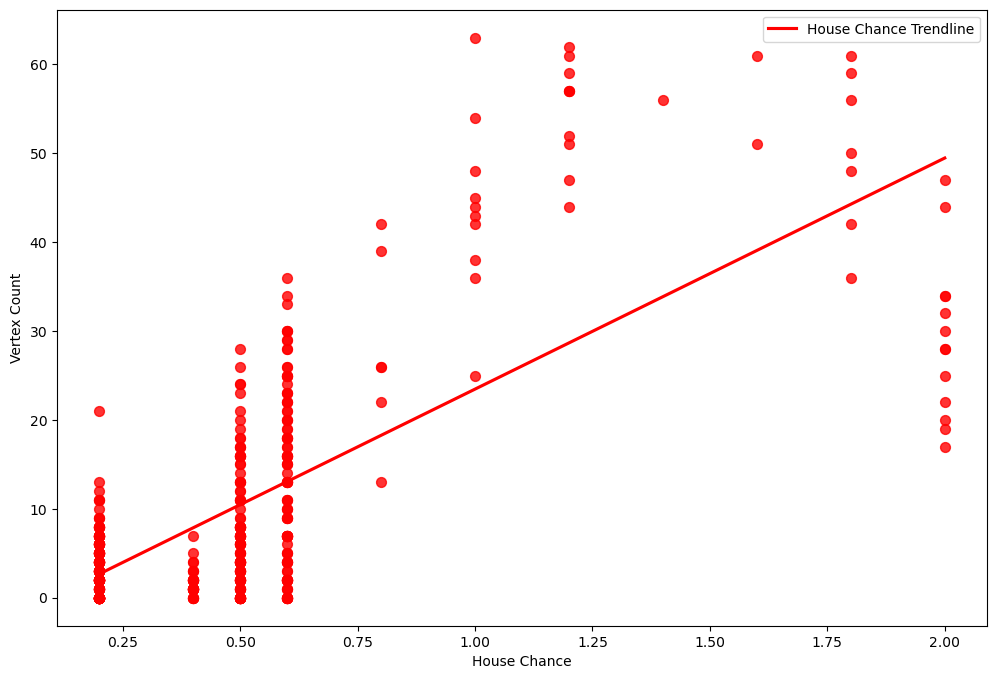

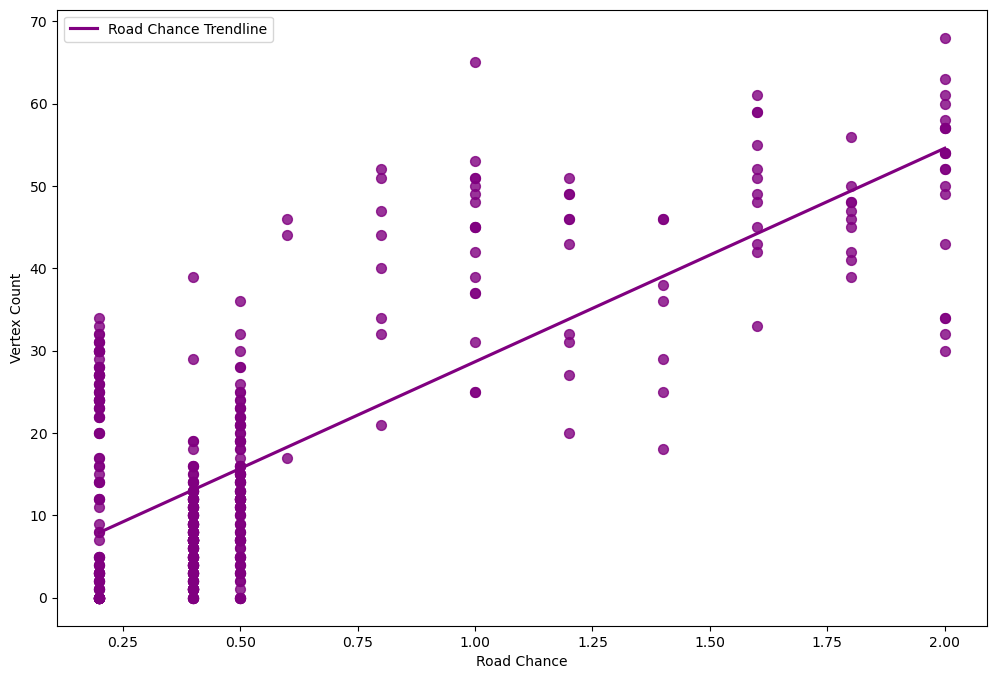

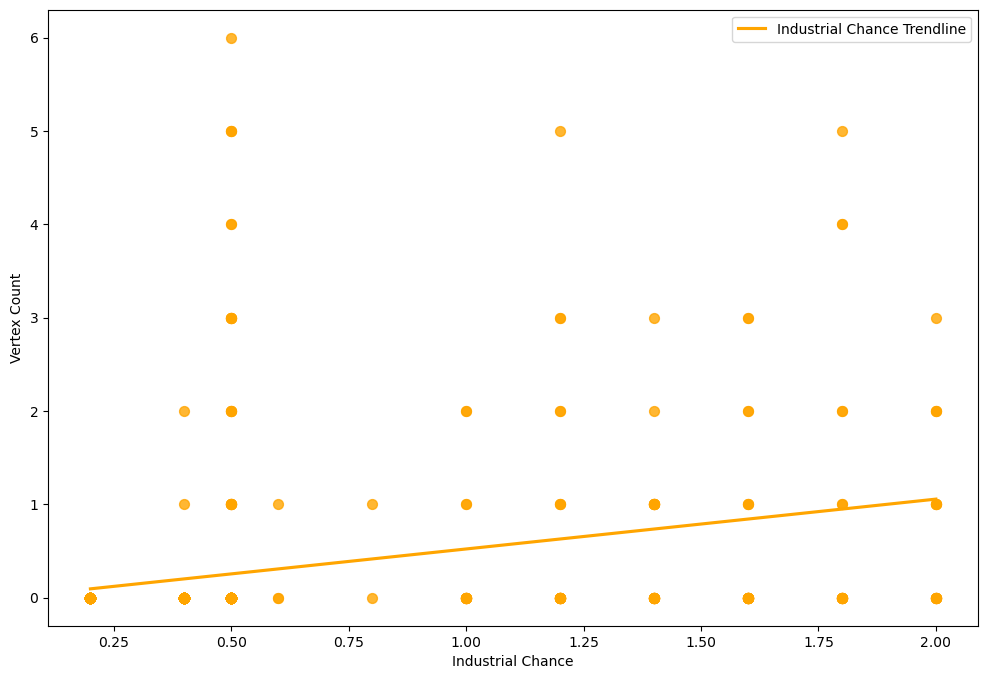

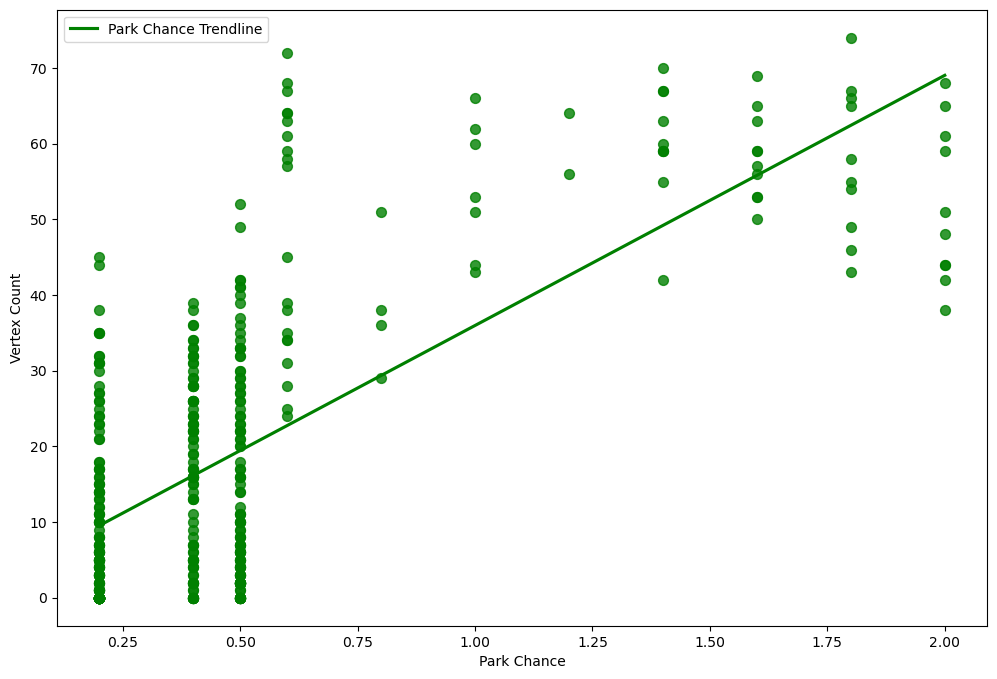

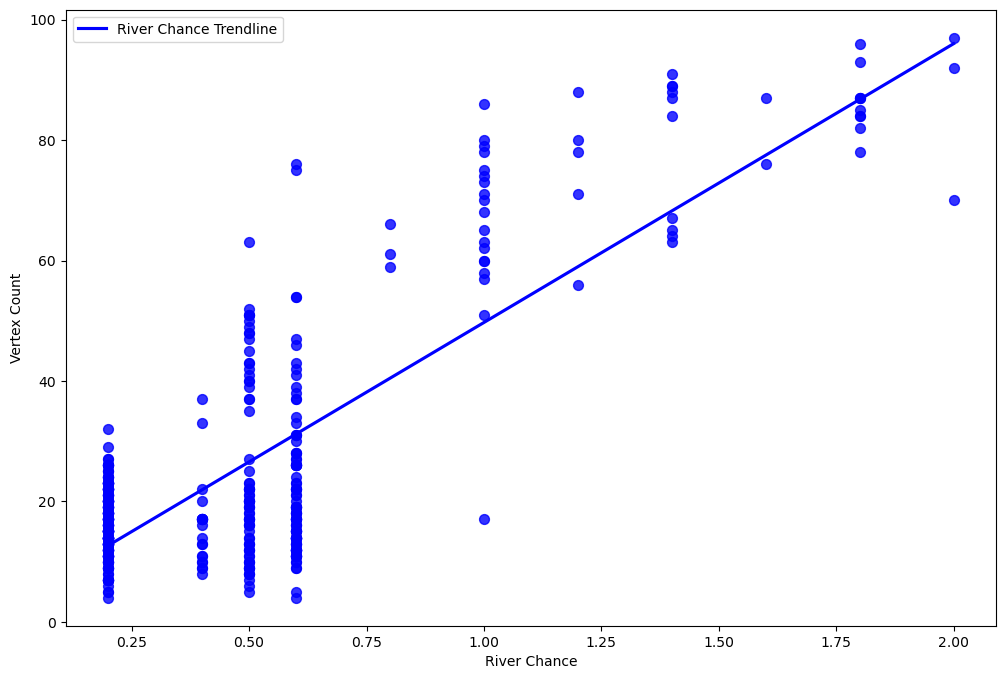

In [38]:
df_filtered = df[df['Size'] == 10]

# Define the mappings for colors and vertex groups
chance_columns = ['House Chance', 'Road Chance', 'Industrial Chance', 'Park Chance', 'River Chance']
vertex_groups = ['house', 'road', 'industrial', 'park', 'river']
colors = ['red', 'purple', 'orange', 'green', 'blue']

# Plot each chance parameter vs vertex count for the specified vertex group
for chance_column, vertex_group, color in zip(chance_columns, vertex_groups, colors):
    plt.figure(figsize=(12, 8))
    
    # Filter the DataFrame for the specific vertex group
    filtered_df = df_filtered[df_filtered['Vertex Group'] == vertex_group]
    
    # Create a scatter plot with a trendline
    sns.regplot(
        data=filtered_df, x=chance_column, y='Vertex Count', 
        scatter_kws={'s': 50, 'color': color}, line_kws={'color': color, 'label': f'{chance_column} Trendline'},
        ci=None
    )
    
    # Adding legend
    plt.legend()
    plt.xlabel(chance_column)
    plt.ylabel('Vertex Count')
    
    # Save each plot individually
    plt.savefig(f'Plots/{vertex_group}_chance_vs_vertex_count.png')
    plt.show()

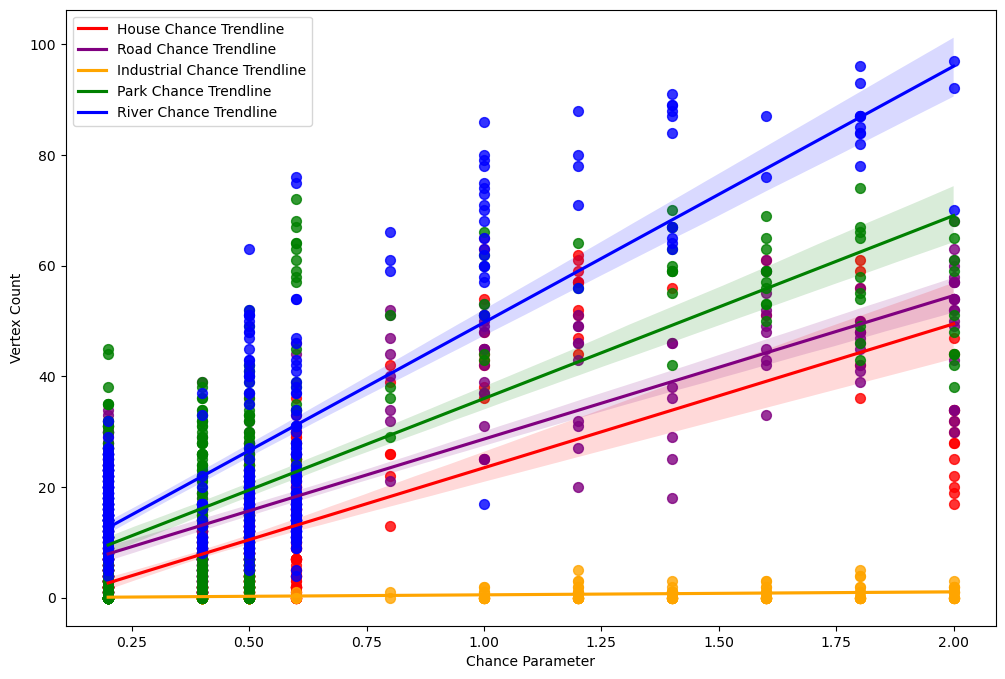

In [37]:
df_filtered = df[df['Size'] == 10]

# Create a combined scatter plot with trendlines for each type
plt.figure(figsize=(12, 8))

# Define colors for each trendline
colors = {
    'House Chance': 'red',
    'Road Chance': 'purple',
    'Industrial Chance': 'orange',
    'Forest Chance': 'green',
    'River Chance': 'blue'
}

# Plot each chance parameter vs vertex count for the specified vertex group
for chance_column, vertex_group, color in zip(
    ['House Chance', 'Road Chance', 'Industrial Chance', 'Park Chance', 'River Chance'],
    ['house', 'road', 'industrial', 'park', 'river'],
    ['red', 'purple', 'orange', 'green', 'blue']
):
    # Filter the DataFrame for the specific vertex group
    filtered_df = df_filtered[df_filtered['Vertex Group'] == vertex_group]
    
    sns.regplot(
        data=filtered_df, x=chance_column, y='Vertex Count', 
        scatter_kws={'s': 50, 'color': color}, line_kws={'color': color, 'label': f'{chance_column} Trendline'}
    )

# Adding legend
plt.legend()
plt.xlabel('Chance Parameter')
plt.ylabel('Vertex Count')
plt.savefig('combined_chance_vs_vertex_count.png')
plt.show()

In [ ]:
# Filter the DataFrame for rows where size is 10
df_filtered = df[df['Size'] == 10]

# Function to create scatter plot with linear trendline and save it
def plot_chance_vs_vertex_count_with_trendline(chance_column, vertex_group, title, file_name):
    # Filter the DataFrame for the specific vertex group
    filtered_df = df_filtered[df_filtered['Vertex Group'] == vertex_group]
    
    plt.figure(figsize=(10, 6))
    sns.regplot(data=filtered_df, x=chance_column, y='Vertex Count', scatter_kws={'s': 50}, line_kws={'color': 'red'})
    
    plt.title(title)
    plt.xlabel(chance_column.replace('_', ' ').title())
    plt.ylabel('Vertex Count')
    plt.savefig(file_name)
    plt.show()

# Create scatter plots with linear trendlines for each type
plot_chance_vs_vertex_count_with_trendline('House Chance', 'house', 'House Chance vs Vertex Count for Houses with Trendline', 'house_chance_vs_vertex_count.png')
plot_chance_vs_vertex_count_with_trendline('Road Chance', 'road', 'Road Chance vs Vertex Count for Roads with Trendline', 'road_chance_vs_vertex_count.png')
plot_chance_vs_vertex_count_with_trendline('Industrial Chance', 'industrial', 'Industrial Chance vs Vertex Count for Industrial Areas with Trendline', 'industrial_chance_vs_vertex_count.png')
plot_chance_vs_vertex_count_with_trendline('Park Chance', 'park', 'Park Chance vs Vertex Count for Parks with Trendline', 'park_chance_vs_vertex_count.png')
plot_chance_vs_vertex_count_with_trendline('River Chance', 'river', 'River Chance vs Vertex Count for Rivers with Trendline', 'river_chance_vs_vertex_count.png')

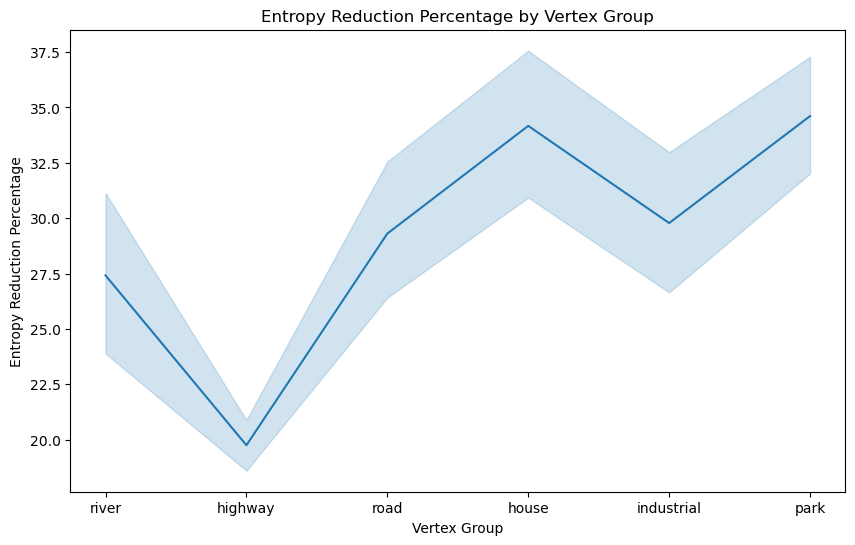

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Vertex Group', y='Entropy Reduction Percentage')
plt.title('Entropy Reduction Percentage by Vertex Group')
plt.xlabel('Vertex Group')
plt.ylabel('Entropy Reduction Percentage')
plt.savefig('Plots/entropy_reduction_by_vertex_group_big_data.png')
plt.show()

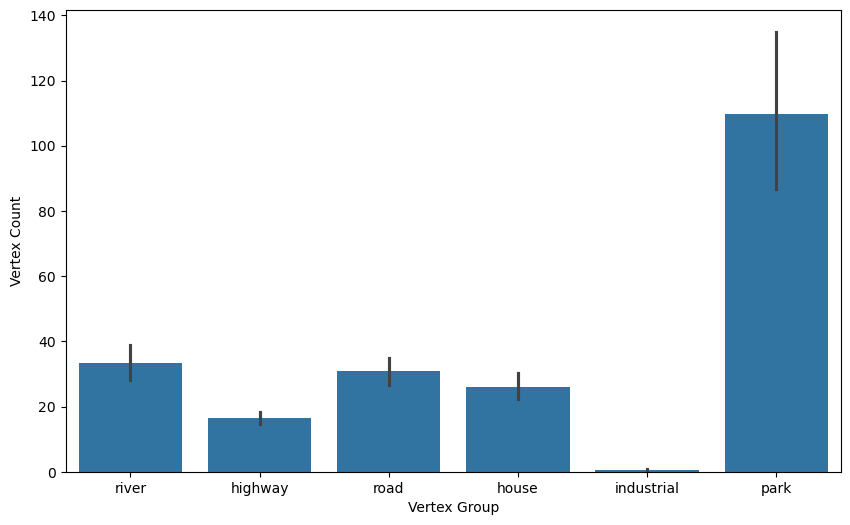

In [27]:
# Bar Plot for Vertex Count
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vertex Group', y='Vertex Count')
plt.xlabel('Vertex Group')
plt.ylabel('Vertex Count')
plt.savefig('vertex_count_by_vertex_group_big_data.png')
plt.show()

In [26]:
file_path = r'C:\Program Files\Blender Foundation\Blender 4.1\city_generation_time_by_size.csv'
df = pd.read_csv(file_path)

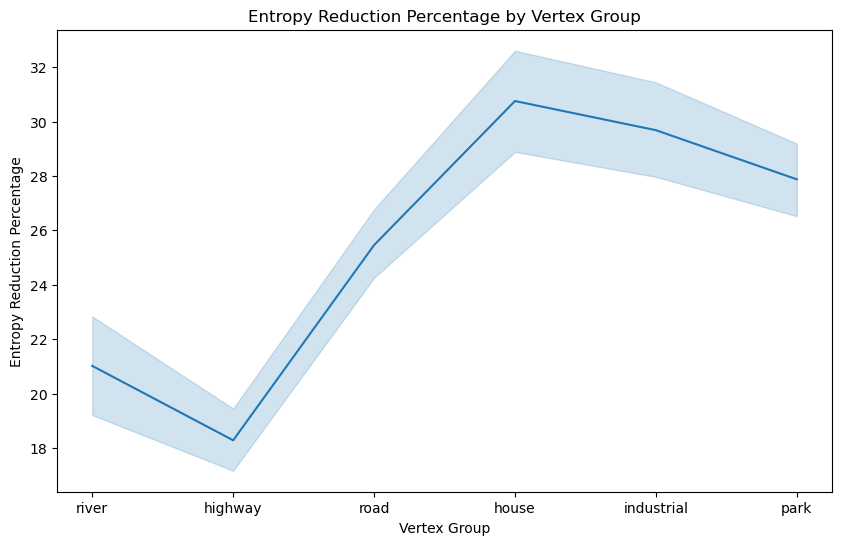

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Vertex Group', y='Entropy Reduction Percentage')
plt.title('Entropy Reduction Percentage by Vertex Group')
plt.xlabel('Vertex Group')
plt.ylabel('Entropy Reduction Percentage')
plt.savefig('Plots/entropy_reduction_by_vertex_group_time_by_size.png')
plt.show()

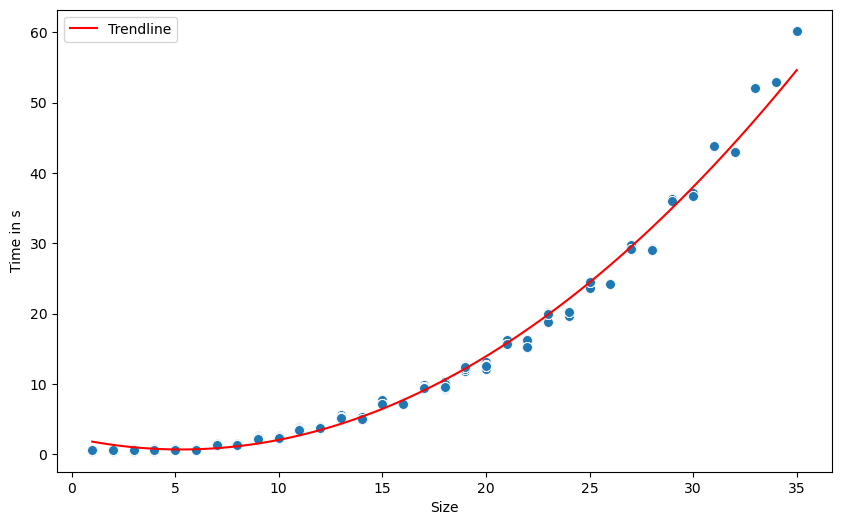

In [28]:
# Scatter Plot for Time in relation to Size with Polynomial Trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size', y='time', s=50)

# Fit a polynomial regression (second-degree polynomial)
z = np.polyfit(df['Size'], df['time'], 2)
p = np.poly1d(z)

# Generate x values for plotting the polynomial
x = np.linspace(df['Size'].min(), df['Size'].max(), 100)
plt.plot(x, p(x), color='red', label="Trendline")
plt.legend()

plt.xlabel('Size')
plt.ylabel('Time in s')

# Save the plot
plt.savefig('Plots/Time_by_Size_with_Polynomial_Trendline.png')

plt.show()

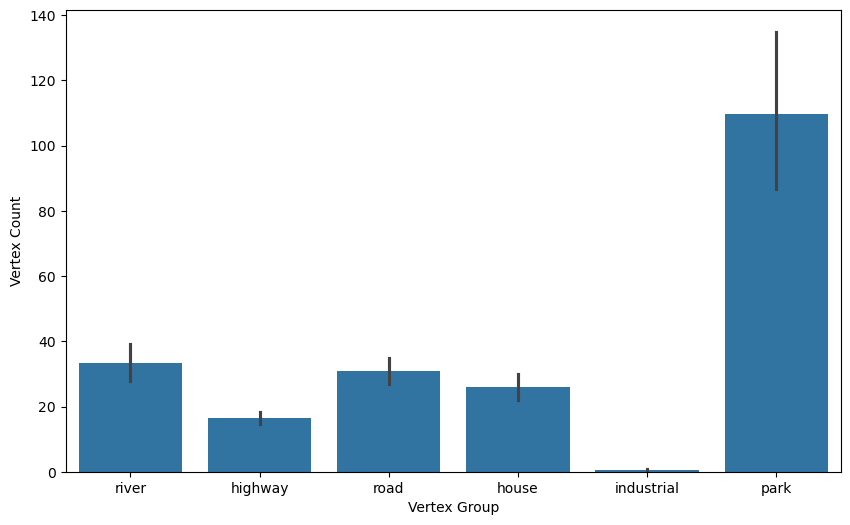

In [29]:
# Bar Plot for Vertex Count
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vertex Group', y='Vertex Count')
plt.xlabel('Vertex Group')
plt.ylabel('Vertex Count')
plt.savefig('vertex_count_by_vertex_group_time_by_size.png')
plt.show()